In [2]:
from keras.applications import VGG16  #VGG16 이란 모델을 가져온다  어디서 우승한 모델임

conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

58892288/58889256 [==============================] - 52s 1us/step


In [3]:
conv_base.summary()
#  이렇게 생겼다.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [15]:
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir='C:\\dogncat\\copy'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')

datagen=ImageDataGenerator(rescale=1./255)
batch_size=20

def extract_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,4,4,512))
    labels=np.zeros(shape=(sample_count))
    generator=datagen.flow_from_directory(directory,target_size=(150,150),
                                        batch_size=batch_size,class_mode='binary')
    
    
    i=0
    for input_batch, labels_batch in generator:
        features_batch=conv_base.predict(input_batch)
        features[i*batch_size:(i+1)*batch_size]=features_batch
        labels[i*batch_size:(i+1)*batch_size]=labels_batch
        i+=1
        if i*batch_size>=sample_count:
            break
    return features, labels

train_features, train_labels=extract_features(train_dir,2000)
validation_features,validation_labels=extract_features(validation_dir,1000)
test_features,test_labels=extract_features(test_dir,1000)

    

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
train_features=np.reshape(train_features,(2000,4*4*512))
validation_features=np.reshape(validation_features,(1000,4*4*512))
test_features=np.reshape(test_features,(1000,4*4*512))

In [21]:
from keras import models
from keras import layers
from keras import optimizers

model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

history=model.fit(train_features,train_labels,
                 epochs=30,
                 batch_size=20,
                 validation_data=(validation_features,validation_labels))


Instructions for updating:
Use tf.cast instead.
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 812us/step - loss: 0.6085 - acc: 0.6765 - val_loss: 0.4443 - val_acc: 0.8380
Epoch 2/30
2000/2000 [==============================] - 1s 386us/step - loss: 0.4302 - acc: 0.8145 - val_loss: 0.3624 - val_acc: 0.8680
Epoch 3/30
2000/2000 [==============================] - 1s 381us/step - loss: 0.3603 - acc: 0.8490 - val_loss: 0.3218 - val_acc: 0.8820
Epoch 4/30
2000/2000 [==============================] - 1s 381us/step - loss: 0.3154 - acc: 0.8690 - val_loss: 0.2966 - val_acc: 0.8820
Epoch 5/30
2000/2000 [==============================] - 1s 379us/step - loss: 0.2899 - acc: 0.8775 - val_loss: 0.2876 - val_acc: 0.8830
Epoch 6/30
2000/2000 [==============================] - 1s 379us/step - loss: 0.2684 - acc: 0.8895 - val_loss: 0.2713 - val_acc: 0.9020
Epoch 7/30
2000/2000 [==============================] - 1s 380us/step - loss: 0.2524 - a

In [22]:
import matplotlib.pyplot as plt

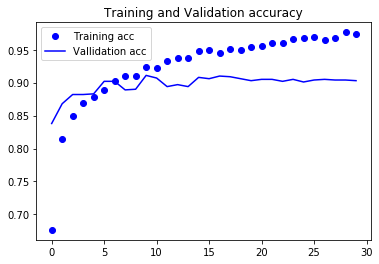

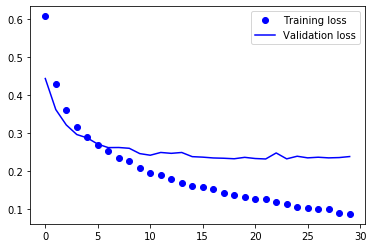

In [28]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Vallidation acc')
plt.title('Training and Validation accuracy')

plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()

In [30]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [32]:
conv_base.trainable=False

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data